In [1]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from alive_progress import alive_bar

R = 4
r = 2
    
def torus_point(theta, phi):
    return [(r*math.cos(theta)+R)*math.cos(phi), (r*math.cos(theta)+R)*math.sin(phi), r*math.sin(theta)]

n = 2
a = np.random.randn(n,n)
b = np.random.randn(n,n)

print(a)
a = np.array([[ 0.89090697,  1.31282977], [-0.67674201, -1.17620531]])

def random_trig(theta, phi):
    return sum([sum([a[i,j]*np.cos((i+1)*theta)*np.sin((j+1)*phi) for i in range(n)]) for j in range(n)])

def trig_vf(tp):
    phi = tp[1]
    theta = tp[0]
    return np.array([sum([sum([-a[i,j]*(i+1)*np.sin((i+1)*theta)*np.sin((j+1)*phi) for i in range(n)]) for j in range(n)]),
            sum([sum([a[i,j]*np.cos((i+1)*theta)*(j+1)*np.cos((j+1)*phi) for i in range(n)]) for j in range(n)])])

[[1.2789176  0.76308771]
 [1.10127746 0.92456256]]


In [2]:
def flow(init_tps):
    dt = 0.1
    num_steps = 25

    tps = np.empty((num_steps + 1, 2))  
    tps[0] = init_tps

    for i in range(num_steps):
        tps[i + 1] = tps[i] + trig_vf(tps[i]) * dt

    xyzs = np.empty((num_steps + 1, 4))  
    for i in range(num_steps+1):
        xyzs[i][0] = dt*i
        xyzs[i][1:] = torus_point(tps[i][0], tps[i][1])

    xyz_coords = np.empty((num_steps+1, 3))
    for i in range(num_steps+1):
        xyz_coords[i] = xyzs[i][1:]
    return xyzs, xyz_coords


N = 625
sqrt_N = 25.00
xyzs = [0 for i in range(N)]
xyz_coords = [0 for i in range(N)]
for i in range(N):
    xyzs[i], xyz_coords[i] = flow((2*math.pi*int(i/sqrt_N)/sqrt_N, 2*math.pi*(i%int(sqrt_N))/sqrt_N))

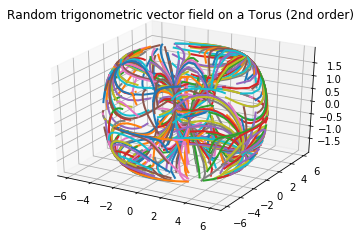

In [3]:
import matplotlib.pyplot as plt
ax = plt.figure().add_subplot(projection='3d')

for i in range(N):
    ax.plot(*xyz_coords[i].T, lw=2)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Random trigonometric vector field on a Torus (2nd order)")
plt.show()
traj_list = xyzs

In [4]:
#traj_list = list_traj
print('Trajectory shape before embedding:')
print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))

def embedding(xyz):
    return np.hstack((xyz, 1*np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 2*np.ones(xyz.shape)), 
                      1*np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 3*np.ones(xyz.shape))))

                     
A = np.random.randn(2, 9)

print(A)
A = [[ 0.36956572, -0.56530295, -0.08434743, -1.27003323, -0.34177907, -1.31266121, 0.08831102,  0.36965217,  0.83838318],
 [-1.46928237,  2.41508164, 2.59267909, -.69745742,-1.63944946,-0.05751269, -0.12781221,  0.19239181, 1.40852378],
 [ 0.18748471, -0.53227022,0.66637963, 0.92152638, 0.37343253, -0.14106446, -1.64379584, -0.58575294,  0.27286669]]
A = [[-0.50606406, -0.01208695, -0.77824182,  0.09250119, -0.26805318, -1.80277067,
   0.65785078, -1.50108459,  1.40912873]]
'''
A = [[ 0.26091896, -1.41097101,  0.83429924,  0.29977495,  1.58207845,  0.14060155,
   0.36938206, -0.35587076, -1.62595019],
 [-1.1529032, 0.54976141,  1.58742566,  1.51749454,  0.409861, 0.03610766,
  -0.82956347, 0.84117888, -0.72650092]]
'''
project = True

def embed_and_project(xyz, project=True):
    if project == True:
        return np.matmul(A, embedding(xyz).T).T
    else:
        return embedding(xyz)
    
tlist_new = [0.0 for i in range(len(traj_list))]
for i in range(len(traj_list)):
    tlist_new[i] = np.hstack((np.reshape(traj_list[i][:,0],(traj_list[i][:,0].shape[0],1)), embed_and_project(traj_list[i][:,1:], project)))
#traj_list = tlist_new
if project == True:
    print('Trajectory shape after embedding and projecting:')
else:
    print('Trajectory shape after embedding:')

print(tlist_new[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))
list_traj = tlist_new

Trajectory shape before embedding:
(26, 4)
[[ 0.10562304 -0.32581171  1.69973421 -0.56180121 -0.09341101  0.31593012
   0.79298914  0.11378701 -0.8214844 ]
 [-1.02424047  0.29815153  0.11745374 -0.73560147 -1.44475024 -0.29897547
  -0.5413791   0.50434676 -0.32615302]]
Trajectory shape after embedding and projecting:
(26, 2)


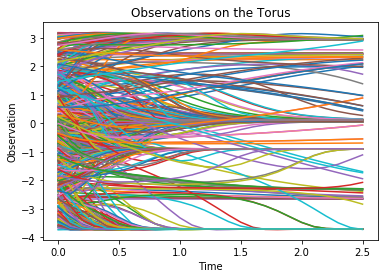

In [6]:
if project == True and list_traj[0].shape[1] > 2:
    ax = plt.figure().add_subplot(projection='3d')
    for i in range(0,len(list_traj)):
        ax.plot(*list_traj[i].T)
    ax.set_title("Observations on the Torus")
    plt.show()
    
elif project == True:
    ax = plt.figure().add_subplot()
    for i in range(0,len(list_traj)):
        ax.plot(*list_traj[i].T)
    ax.set_title("Observations on the Torus")
    plt.xlabel('Time')
    plt.ylabel('Observation')
    plt.show()

In [ ]:
t2s = Traj2Sim()

load=False

if load == False:
    t2s.set_trajectories(list_traj)
    t2s.compute_mssd(verbose=False)
    t2s.save_bifilt(filename='grad_random_trig_625_bw2_hd.npy')
if load == True:
    t2s.load_bifilt(filename='grad_random_trig_625_bw2_hd.npy')

|███▌                                    | ▄▆█ 16852/195000 [9%] in 13:37 ((18.5/s ▂▂▄ 25/195000 [0%] in 1s (17.9/s29/195000 [0%] in 2s (18.2/s(17.1/s (16.9/s ▅▇▇ 64/195000 [0%] in 4s (17.0/s ▇▅▃ 72/195000 [0%] in 4s (16.8/s (16.2/ ▆▄▂ 179/195000 [0%] in 11s (15.7▅▇▇ 196/195000 [0%] in 13s (15.6241/195000 [0%] in 16s (15.5▅▇▇ 286/195000 [0%] in 18s (15.7 ▂▂▄ 304/195000 [0%] in 19s (15.7 in 20s (15.6 (15.6 354/195000 [0%] in 22s (15.9(15.9(15.8▇▅▃ 377/195000 [0%] in 24s (15.7 ▂▂▄ 455/195000 [0%] in 28s (16.1 ▇▅▃ 505/195000 [0%] in 31s (16.3508/195000 [0%] in 31s (16.4▆▄▂ 541/195000 [0%] in 33s (16.5▅▇▇ 559/195000 [0%] in 34s (16.5 ▃▁▃ 574/195000 [0%] in 35s (16.5 ▁▃▅ 610/195000 [0%] in 37s (16.7▄▂▂ 632/195000 [0%] in 38s (16.6635/195000 [0%] in 38s (16.6638/195000 [0%] in 38s (16.6 (16.8 717/195000 [0%] in 43s (16.8723/195000 [0%] in 43s (16.8▃▅▇ 745/195000 [0%] in 44s (16.8 ▁▃▅ 776/195000 [0%] in 46s (16.9 ▇▅▃ 859/195000 [0%] in 51s (16.9 (16.9▄▂▂ 921/195000 [0%] in 55s (16.9 (16.9 (16

|████████▎                               | ▅▇▇ 40451/195000 [21%] in 31:24  16877/195000 [9%] in 13:39 (16883/195000 [9%] in 13:39 (▄▂▂ 16913/195000 [9%] in 13:40 (17011/195000 [9%] in 13:45 ( ▃▁▃ 17243/195000 [9%] in 13:56 ( ( 17283/195000 [9%] in 13:58 ( ▆▄▂ 17307/195000 [9%] in 13:59 ( 17310/195000 [9%] in 13:59 (in 14:01 ( ▇▅▃ 17453/195000 [9%] in 14:06 (▇▇▅ 17489/195000 [9%] in 14:07 (▃▁▃ 17542/195000 [9%] in 14:10 ( ( ▃▅▇ 17812/195000 [9%] in 14:22 ((▁▃▅ 18025/195000 [9%] in 14:32 (▇▅▃ 18085/195000 [9%] in 14:35 ( 18182/195000 [9%] in 14:39 ( ▃▁▃ 18244/195000 [9%] in 14:42 ( 18256/195000 [9%] in 14:43 (18482/195000 [9%] in 14:54 (in 15:05  ▂▄▆ 18799/195000 [10%] in 15:08 18819/195000 [10%] in 15:09 in 15:10   ▅▇▇ 18949/195000 [10%] in 15:15 in 15:15 19012/195000 [10%] in 15:18  in 15:23 ▃▁▃ 19154/195000 [10%] in 15:25  19282/195000 [10%] in 15:31 ▇▇▅ 19317/195000 [10%] in 15:32   in 15:36 in 15:43 19705/195000 [10%] in 15:50  19784/195000 [10%] in 15:53 19813/195000 [10%] in 15:5

|███████████▊                            | █▆▄ 57048/195000 [29%] in 44:32 ▆▄▂ 40469/195000 [21%] in 31:25 in 31:25   in 31:35 40730/195000 [21%] in 31:37  40830/195000 [21%] in 31:41 40834/195000 [21%] in 31:41  40906/195000 [21%] in 31:45  █▆▄ 41016/195000 [21%] in 31:50  ▂▂▄ 41101/195000 [21%] in 31:54  in 31:59  in 32:00  in 32:01 41331/195000 [21%] in 32:04  ▅▃▁ 41381/195000 [21%] in 32:06 41386/195000 [21%] in 32:06   41523/195000 [21%] in 32:13   ▇▅▃ 41635/195000 [21%] in 32:18   41783/195000 [21%] in 32:24 ▄▂▂ 41863/195000 [21%] in 32:28  in 32:28     in 32:34  in 32:35 in 32:37  42058/195000 [22%] in 32:37 42152/195000 [22%] in 32:41  in 32:47  in 32:54 42457/195000 [22%] in 32:55  42489/195000 [22%] in 32:56  42548/195000 [22%] in 32:59  in 33:04  ▂▂▄ 42759/195000 [22%] in 33:08  42766/195000 [22%] in 33:08  in 33:12  ▆█▆ 42853/195000 [22%] in 33:12  42942/195000 [22%] in 33:16 43068/195000 [22%] in 33:22 43112/195000 [22%] in 33:24 ▃▁▃ 43131/195000 [22%] in 33:25 ▇▇▅ 43260/1

|██████████████▏                         | ▆▄▂ 69026/195000 [35%] in 55:22  in 44:35   57154/195000 [29%] in 44:38  ▃▁▃ 57199/195000 [29%] in 44:40  in 44:42 57278/195000 [29%] in 44:45  ▇▅▃ 57285/195000 [29%] in 44:45  ▂▂▄ 57332/195000 [29%] in 44:48  ▂▄▆ 57339/195000 [29%] in 44:48  █▆▄ 57352/195000 [29%] in 44:49  57357/195000 [29%] in 44:49 in 44:53   ▁▃▅ 57440/195000 [29%] in 44:54 ▂▄▆ 57443/195000 [29%] in 44:54  █▆▄ 57458/195000 [29%] in 44:55  in 44:57  in 45:01 ▃▁▃ 57601/195000 [30%] in 45:03  in 45:03   ▂▄▆ 57686/195000 [30%] in 45:07 ▄▆█ 57723/195000 [30%] in 45:10 57767/195000 [30%] in 45:12 57822/195000 [30%] in 45:15 in 45:16  in 45:18 57889/195000 [30%] in 45:19  57905/195000 [30%] in 45:20 57912/195000 [30%] in 45:20  ▂▂▄ 57950/195000 [30%] in 45:22 57972/195000 [30%] in 45:23 in 45:28 58066/195000 [30%] in 45:29 58079/195000 [30%] in 45:29  ▅▇▇ 58091/195000 [30%] in 45:30  in 45:32  ▁▃▅ 58142/195000 [30%] in 45:33  58148/195000 [30%] in 45:33  ▇▇▅ 58192/195000 [30%] in

|████████████████▎                       | ▇▅▃ 79350/195000 [41%] in 1:04:3 69033/195000 [35%] in 55:23  ▂▄▆ 69043/195000 [35%] in 55:23  in 55:26 69142/195000 [35%] in 55:28  69169/195000 [35%] in 55:30  ▆█▆ 69177/195000 [35%] in 55:30 ▇▇▅ 69180/195000 [35%] in 55:30  ▆▄▂ 69186/195000 [35%] in 55:31 ▅▇▇ 69209/195000 [35%] in 55:32 69224/195000 [35%] in 55:33  ▆█▆ 69317/195000 [36%] in 55:38  ▃▁▃ 69335/195000 [36%] in 55:39  69360/195000 [36%] in 55:40  in 55:41  █▆▄ 69389/195000 [36%] in 55:42  69447/195000 [36%] in 55:45 ▄▆█ 69480/195000 [36%] in 55:47  in 55:50 ▆█▆ 69548/195000 [36%] in 55:50  in 55:51 ▅▇▇ 69610/195000 [36%] in 55:54  69631/195000 [36%] in 55:55  ▆█▆ 69677/195000 [36%] in 55:57  ▅▇▇ 69739/195000 [36%] in 56:01 ▆▄▂ 69750/195000 [36%] in 56:01  69774/195000 [36%] in 56:03 ▇▇▅ 69807/195000 [36%] in 56:05  ▁▃▅ 69826/195000 [36%] in 56:06   69906/195000 [36%] in 56:10  in 56:10 in 56:14  70066/195000 [36%] in 56:18  70130/195000 [36%] in 56:21 70223/195000 [36%] in 56:25

|███████████████████▏                    | ▆█▆ 93053/195000 [48%] in 1:16:179440/195000 [41%] in 1:04:4▄▂▂ 79454/195000 [41%] in 1:04:4 79540/195000 [41%] in 1:04:4 in 1:04:4▇▅▃ 79580/195000 [41%] in 1:04:479678/195000 [41%] in 1:04:5 █▆▄ 79682/195000 [41%] in 1:04:5 79728/195000 [41%] in 1:04:5 in 1:04:5in 1:04:5▆▄▂ 79849/195000 [41%] in 1:05:0 80018/195000 [41%] in 1:05:1in 1:05:1 80068/195000 [41%] in 1:05:1 ▄▂▂ 80139/195000 [41%] in 1:05:1in 1:05:2 ▅▃▁ 80206/195000 [41%] in 1:05:2in 1:05:2 ▄▂▂ 80270/195000 [41%] in 1:05:2 ▅▇▇ 80316/195000 [41%] in 1:05:2 in 1:05:3▃▅▇ 80381/195000 [41%] in 1:05:3 80441/195000 [41%] in 1:05:3in 1:05:3 80530/195000 [41%] in 1:05:480618/195000 [41%] in 1:05:4▇▅▃ 80669/195000 [41%] in 1:05:4 in 1:05:5▆▄▂ 80738/195000 [41%] in 1:05:5 ▂▂▄ 80749/195000 [41%] in 1:05:5 ▅▇▇ 80760/195000 [41%] in 1:05:5 ▇▇▅ 80765/195000 [41%] in 1:05:5 80787/195000 [41%] in 1:05:5 in 1:05:5 80861/195000 [41%] in 1:05:5 in 1:06:0▆█▆ 80898/195000 [41%] in 1:06:0in 1:06:0 in 1:0

|██████████████████████                  | ▃▁▃ 107490/195000 [55%] in 1:28: ▅▃▁ 93146/195000 [48%] in 1:16:2 93194/195000 [48%] in 1:16:2 ▇▇▅ 93284/195000 [48%] in 1:16:3 93345/195000 [48%] in 1:16:3 ▂▂▄ 93378/195000 [48%] in 1:16:393558/195000 [48%] in 1:16:4 ▇▇▅ 93621/195000 [48%] in 1:16:4▂▄▆ 93686/195000 [48%] in 1:16:4in 1:16:5in 1:16:5 94046/195000 [48%] in 1:17:094163/195000 [48%] in 1:17:0in 1:17:1 94247/195000 [48%] in 1:17:1 ▂▄▆ 94255/195000 [48%] in 1:17:194416/195000 [48%] in 1:17:1▁▃▅ 94552/195000 [48%] in 1:17:294838/195000 [49%] in 1:17:3▁▃▅ 95056/195000 [49%] in 1:17:4▄▂▂ 95157/195000 [49%] in 1:17:5 ▃▁▃ 95160/195000 [49%] in 1:17:5 95167/195000 [49%] in 1:17:595192/195000 [49%] in 1:17:595343/195000 [49%] in 1:17:5 ▇▇▅ 95372/195000 [49%] in 1:18:0 in 1:18:0▇▇▅ 95448/195000 [49%] in 1:18:0 ▇▇▅ 95478/195000 [49%] in 1:18:0 ▃▅▇ 95499/195000 [49%] in 1:18:0in 1:18:195583/195000 [49%] in 1:18:1 ▆▄▂ 95587/195000 [49%] in 1:18:1 ▃▁▃ 95619/195000 [49%] in 1:18:1in 1:18:1 95645

|████████████████████████▊               | ▃▁▃ 120693/195000 [62%] in 1:39: 107535/195000 [55%] in 1:28: ▇▇▅ 107544/195000 [55%] in 1:28:▆█▆ 107577/195000 [55%] in 1:28: 107593/195000 [55%] in 1:28:in 1:28:in 1:28:▄▆█ 107641/195000 [55%] in 1:28: ▄▂▂ 107660/195000 [55%] in 1:28:▃▁▃ 107664/195000 [55%] in 1:28:107670/195000 [55%] in 1:28: 107766/195000 [55%] in 1:28:in 1:28: ▁▃▅ 107918/195000 [55%] in 1:28: ▂▂▄ 107980/195000 [55%] in 1:28: in 1:28:▆█▆ 108027/195000 [55%] in 1:28: ▆▄▂ 108147/195000 [55%] in 1:28:▃▁▃ 108231/195000 [56%] in 1:28:in 1:28: 108302/195000 [56%] in 1:28:in 1:28: ▅▃▁ 108476/195000 [56%] in 1:28: ▂▄▆ 108489/195000 [56%] in 1:28:in 1:28: 108555/195000 [56%] in 1:29:▅▇▇ 108567/195000 [56%] in 1:29: 108655/195000 [56%] in 1:29:in 1:29: in 1:29: in 1:29: in 1:29: 108897/195000 [56%] in 1:29: ▆▄▂ 108932/195000 [56%] in 1:29: in 1:29:108970/195000 [56%] in 1:29:109003/195000 [56%] in 1:29:109024/195000 [56%] in 1:29:in 1:29: ▇▇▅ 109168/195000 [56%] in 1:29: 109223/1950

|███████████████████████████▊            | ▂▂▄ 135497/195000 [69%] in 1:50:44 ▂ 120728/195000 [62%] in 1:39: ▇▅▃ 120754/195000 [62%] in 1:39: in 1:39:120823/195000 [62%] in 1:39:▅▇▇ 120840/195000 [62%] in 1:39:120879/195000 [62%] in 1:39: ▂▄▆ 120906/195000 [62%] in 1:39:121045/195000 [62%] in 1:39: in 1:39:in 1:39:▂▂▄ 121351/195000 [62%] in 1:39: 121370/195000 [62%] in 1:39:▅▃▁ 121377/195000 [62%] in 1:39: ▅▃▁ 121554/195000 [62%] in 1:39: 121639/195000 [62%] in 1:39: ▃▁▃ 121699/195000 [62%] in 1:39:▇▇▅ 121754/195000 [62%] in 1:39: 121760/195000 [62%] in 1:39: in 1:39: ▄▆█ 121813/195000 [62%] in 1:39:█▆▄ 121893/195000 [63%] in 1:40: in 1:40: in 1:40:121928/195000 [63%] in 1:40:▇▅▃ 121970/195000 [63%] in 1:40: ▆█▆ 122070/195000 [63%] in 1:40: ▃▅▇ 122129/195000 [63%] in 1:40: 122159/195000 [63%] in 1:40:▅▇▇ 122169/195000 [63%] in 1:40: █▆▄ 122178/195000 [63%] in 1:40:in 1:40: ▅▃▁ 122186/195000 [63%] in 1:40:122253/195000 [63%] in 1:40:122274/195000 [63%] in 1:40: in 1:40:▁▃▅ 122298/195000

|█████████████████████████████████▊      | ▂▄▆ 164460/195000 [84%] in 2:11: 135549/195000 [70%] in 1:50: in 1:50: 135567/195000 [70%] in 1:50: in 1:50: ▄▂▂ 135690/195000 [70%] in 1:50:in 1:50:▄▆█ 135704/195000 [70%] in 1:50: 135708/195000 [70%] in 1:50:in 1:50:▆▄▂ 135758/195000 [70%] in 1:50: ▇▇▅ 135867/195000 [70%] in 1:51:in 1:51: in 1:51:136008/195000 [70%] in 1:51:in 1:51:▃▅▇ 136082/195000 [70%] in 1:51: 136133/195000 [70%] in 1:51: in 1:51:136311/195000 [70%] in 1:51:█▆▄ 136419/195000 [70%] in 1:51: in 1:51: in 1:51:in 1:51: 136961/195000 [70%] in 1:51: in 1:51: 137015/195000 [70%] in 1:51:137068/195000 [70%] in 1:51: ▇▇▅ 137192/195000 [70%] in 1:52:in 1:52:137444/195000 [70%] in 1:52: █▆▄ 137460/195000 [70%] in 1:52:▇▅▃ 137464/195000 [70%] in 1:52:in 1:52:137540/195000 [71%] in 1:52: in 1:52:▆█▆ 137812/195000 [71%] in 1:52:▇▇▅ 137817/195000 [71%] in 1:52:in 1:52: 137999/195000 [71%] in 1:52: ▄▂▂ 138023/195000 [71%] in 1:52: in 1:52: 138147/195000 [71%] in 1:52:138291/195000 [71%]

|██████████████████████████████████████▍ | ▆▄▂ 187314/195000 [96%] in 2:28:51 2:11: 164525/195000 [84%] in 2:11: ▅▇▇ 164589/195000 [84%] in 2:11:in 2:11: in 2:11:in 2:11: 164835/195000 [85%] in 2:11:164849/195000 [85%] in 2:11:164978/195000 [85%] in 2:11:164985/195000 [85%] in 2:11:▄▂▂ 165048/195000 [85%] in 2:11:in 2:11: 165153/195000 [85%] in 2:11:in 2:12:▃▁▃ 165288/195000 [85%] in 2:12: 165366/195000 [85%] in 2:12: ▄▂▂ 165369/195000 [85%] in 2:12: 165530/195000 [85%] in 2:12:165848/195000 [85%] in 2:12:▆█▆ 165893/195000 [85%] in 2:12: 166051/195000 [85%] in 2:12:166092/195000 [85%] in 2:12: 166133/195000 [85%] in 2:12:166167/195000 [85%] in 2:12:▆█▆ 166192/195000 [85%] in 2:12:166247/195000 [85%] in 2:12: ▂▂▄ 166251/195000 [85%] in 2:12: in 2:12: 166272/195000 [85%] in 2:12: ▄▂▂ 166289/195000 [85%] in 2:12: in 2:12: in 2:12: ▇▅▃ 166590/195000 [85%] in 2:13:166823/195000 [86%] in 2:13:▃▁▃ 166828/195000 [86%] in 2:13:in 2:13: in 2:13:▅▇▇ 166921/195000 [86%] in 2:13: 167070/195000 [86%

|███████████████████████████████████████▍| ▅▇▇ 192119/195000 [99%] in 2:32: in 2:28:187427/195000 [96%] in 2:28:in 2:28: 187478/195000 [96%] in 2:28:▆█▆ 187488/195000 [96%] in 2:28:▁▃▅ 187508/195000 [96%] in 2:28: ▇▅▃ 187523/195000 [96%] in 2:28: 187534/195000 [96%] in 2:28:in 2:28: 187581/195000 [96%] in 2:28: in 2:28:in 2:28:187679/195000 [96%] in 2:28:187708/195000 [96%] in 2:28: ▂▄▆ 187713/195000 [96%] in 2:28:▇▅▃ 187810/195000 [96%] in 2:28:in 2:28: 187910/195000 [96%] in 2:28:in 2:28:in 2:28:188066/195000 [96%] in 2:29: in 2:29:in 2:29:188159/195000 [96%] in 2:29:▅▇▇ 188174/195000 [96%] in 2:29: 188239/195000 [97%] in 2:29:in 2:29: ▄▂▂ 188292/195000 [97%] in 2:29: in 2:29: ▅▃▁ 188389/195000 [97%] in 2:29:▄▆█ 188439/195000 [97%] in 2:29: ▅▇▇ 188472/195000 [97%] in 2:29: in 2:29: ▂▄▆ 188504/195000 [97%] in 2:29:in 2:29: in 2:29: ▃▁▃ 188640/195000 [97%] in 2:29:in 2:29:▁▃▅ 188676/195000 [97%] in 2:29: ▂▄▆ 188746/195000 [97%] in 2:29: ▇▅▃ 188759/195000 [97%] in 2:29:188821/195000 [97

(26, 400, 400)


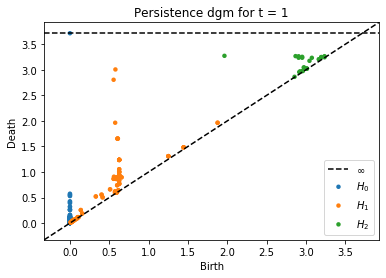

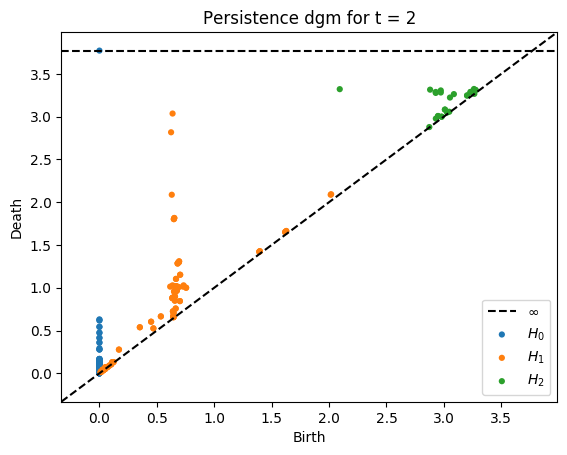

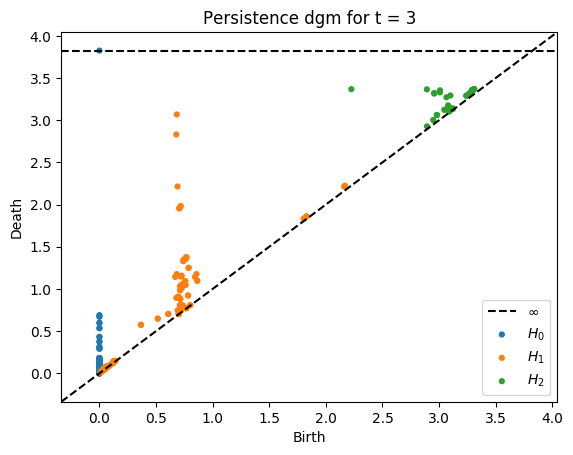

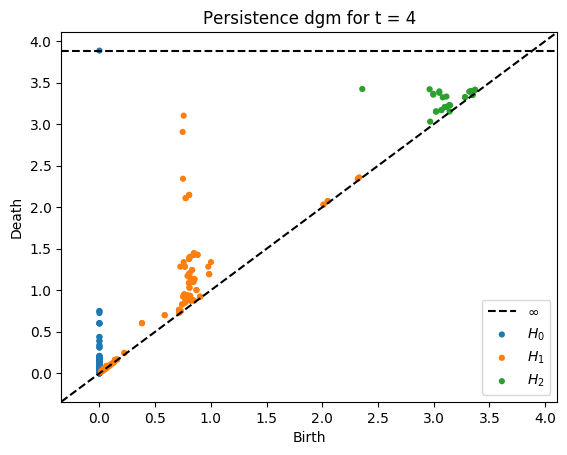

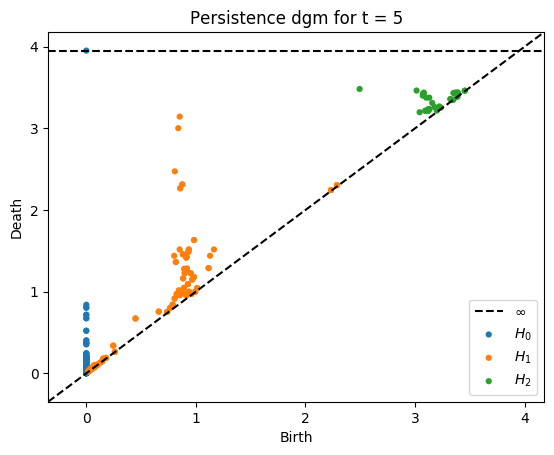

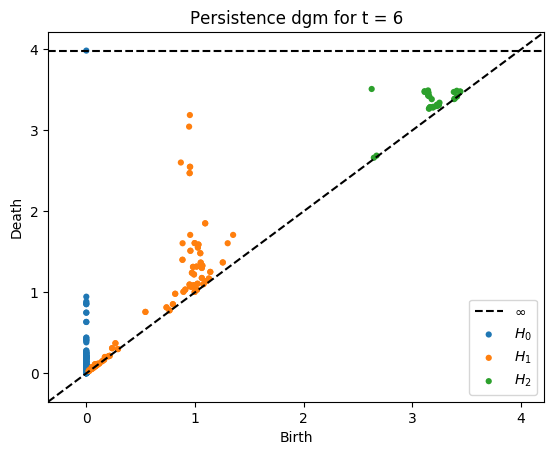

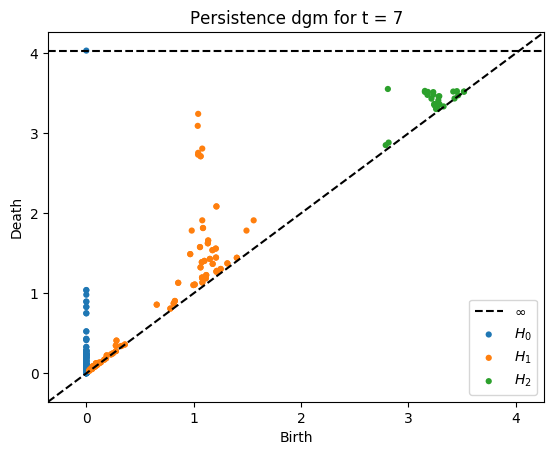

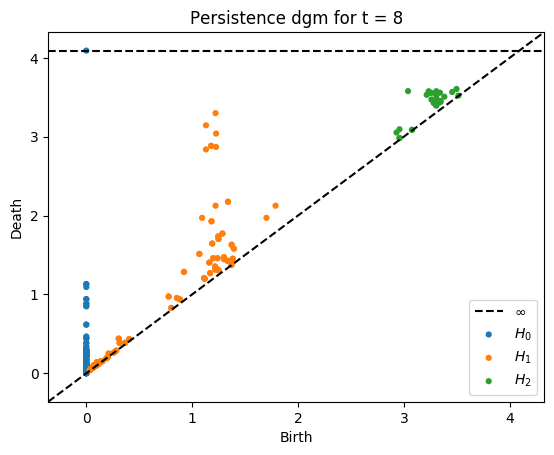

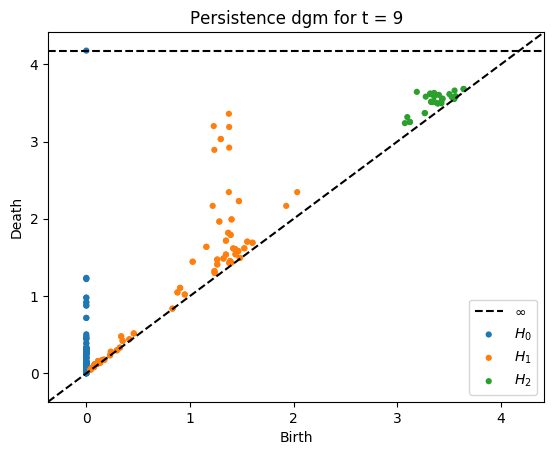

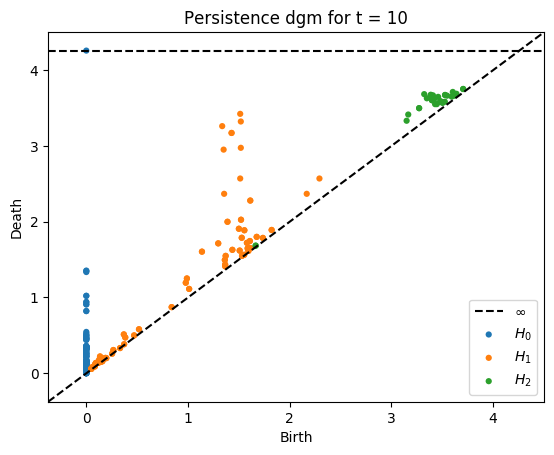

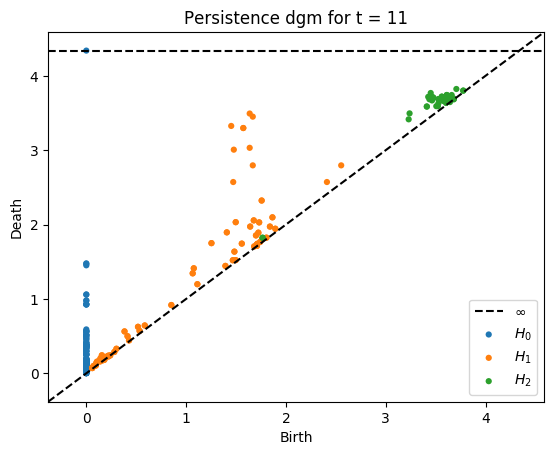

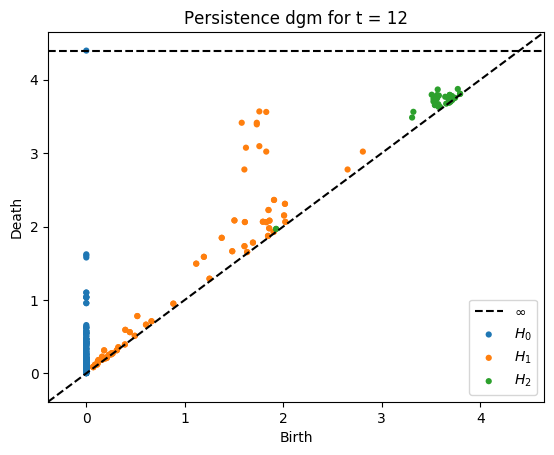

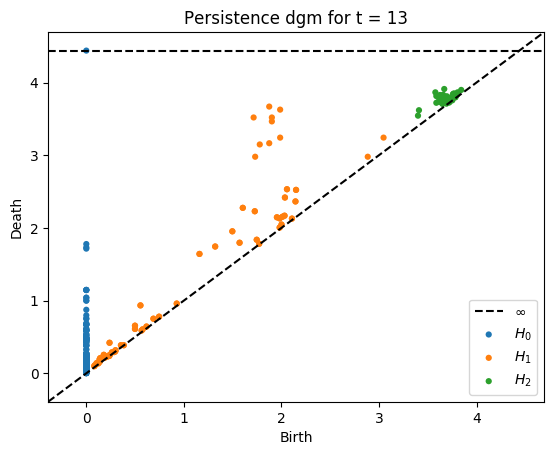

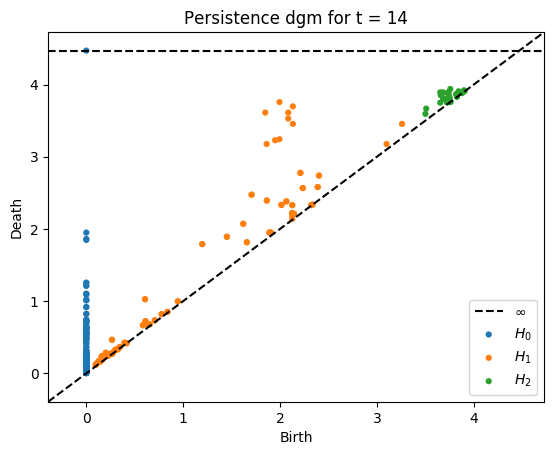

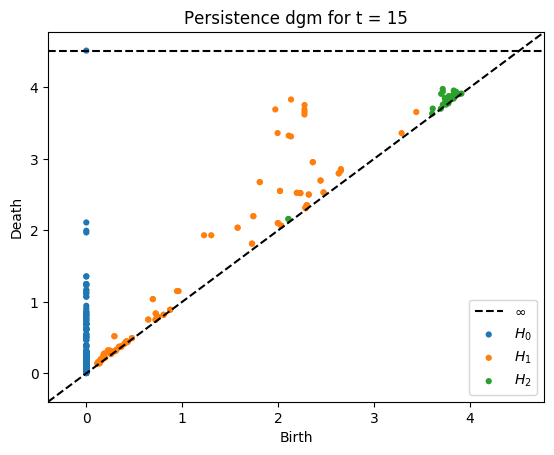

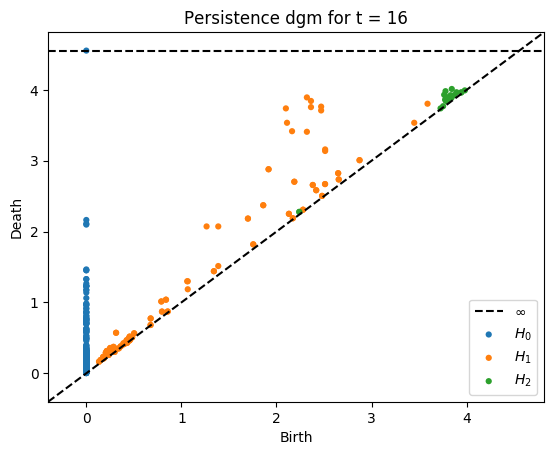

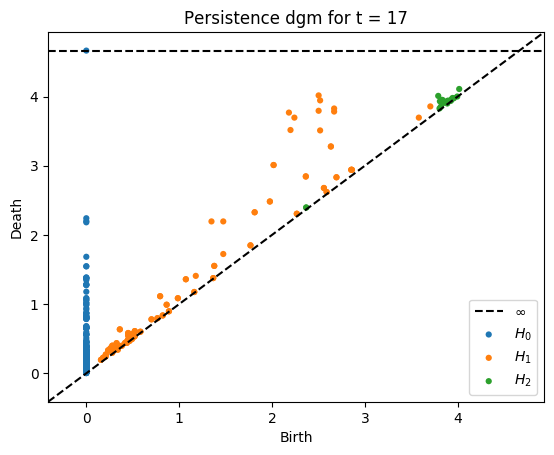

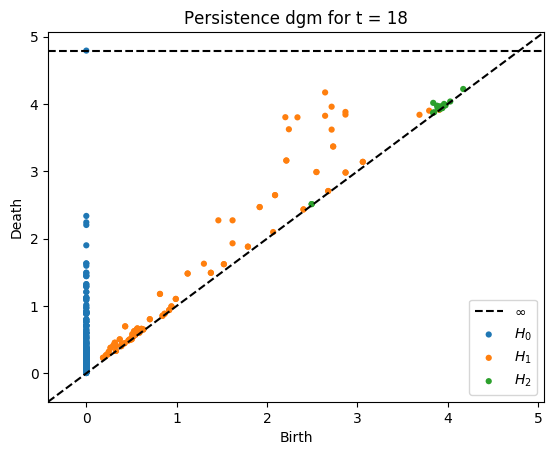

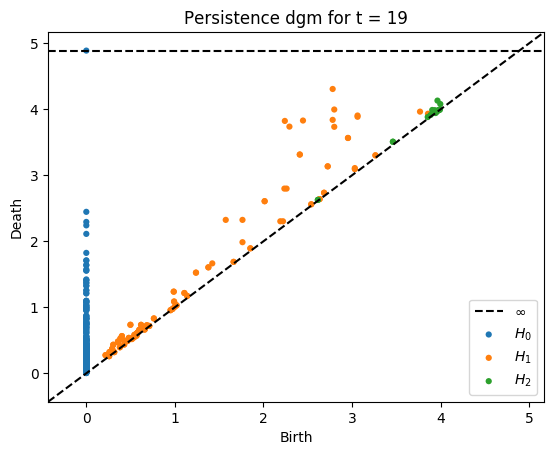

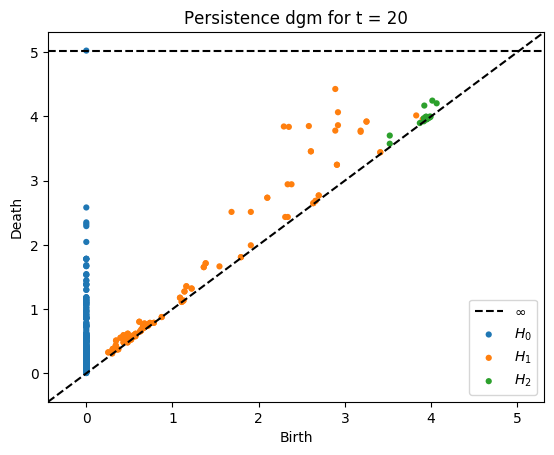

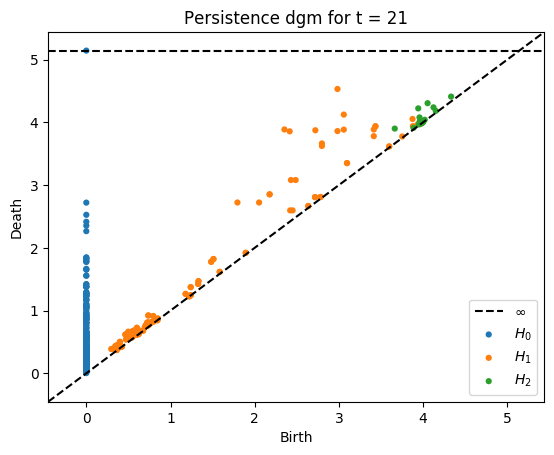

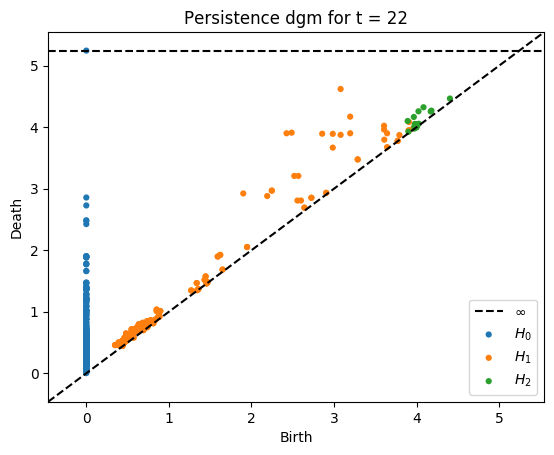

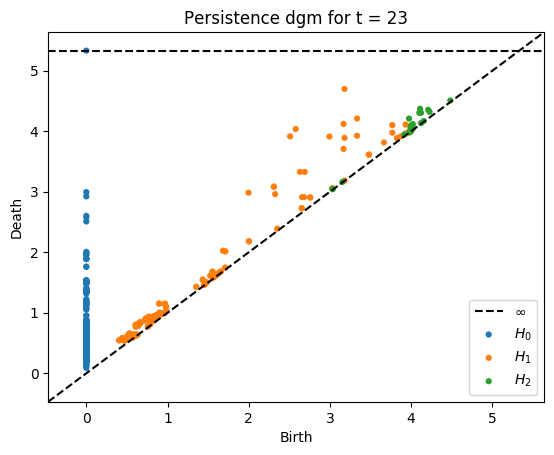

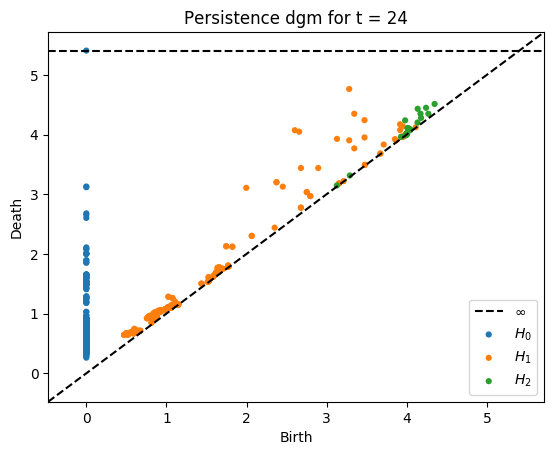

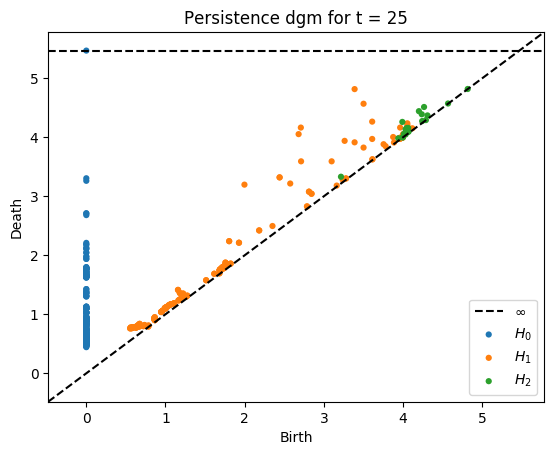

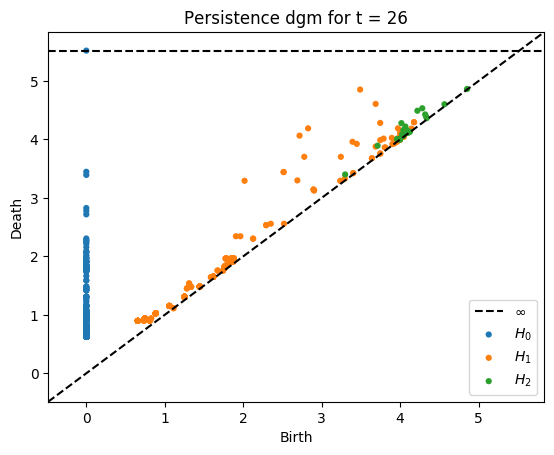

In [9]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

print(t2s.bifilt.shape)

for i in range(t2s.bifilt.shape[0]):
    dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(i+1))
    plot_diagrams(dgms, show = True)